In [ ]:
#impor library
import pandas as pd
import re
import string
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Library berhasil diimpor!")

Matplotlib is building the font cache; this may take a moment.


Library berhasil diimpor!


In [3]:
# Muat dataset
file_path = 'dataset_indonesiam_toxic.csv'
df = pd.read_csv(file_path)

# Fungsi pra-pemrosesan
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"\d+", "", text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    return text

# Terapkan pra-pemrosesan
df['text_cleaned'] = df['Tweet'].apply(preprocess_text)

print("Dataset berhasil dimuat dan dibersihkan.")
df[['Tweet', 'text_cleaned']].head()

Dataset berhasil dimuat dan dibersihkan.


,Tweet,text_cleaned
0,cowok usaha lacak perhati gue lantas remeh per...,cowok usaha lacak perhati gue lantas remeh per...
1,telat tau edan sarap gue gaul cigax jifla cal ...,telat tau edan sarap gue gaul cigax jifla cal ...
2,41 kadang pikir percaya tuhan jatuh kali kali ...,kadang pikir percaya tuhan jatuh kali kali kad...
3,ku tau mata sipit lihat,ku tau mata sipit lihat
4,kaum cebong kafir lihat dongok dungu haha,kaum cebong kafir lihat dongok dungu haha


In [4]:
# Definisikan fitur (X) dan target (y)
X = df['text_cleaned']
y = df['Label']

# Bagi data menjadi 80% data latih dan 20% data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Ukuran data latih (X_train): {X_train.shape[0]}")
print(f"Ukuran data uji (X_test): {X_test.shape[0]}")

Ukuran data latih (X_train): 10174
Ukuran data uji (X_test): 2544


In [5]:
# Buat pipeline model
model_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

print("Memulai pelatihan model pada data latih...")

# Latih model
model_pipeline.fit(X_train, y_train)

print("Pelatihan model selesai!")

Memulai pelatihan model pada data latih...
Pelatihan model selesai!


In [6]:
# Definisikan fitur (X) dan target (y)
X = df['text_cleaned']
y = df['Label']

# Buat pipeline model
model_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

print("Pipeline model berhasil dibuat.")

Pipeline model berhasil dibuat.


In [6]:
# Lakukan prediksi pada data uji
y_pred = model_pipeline.predict(X_test)

# 1. Hitung Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy * 100:.2f}%\n")

# 2. Tampilkan Classification Report
print("Laporan Klasifikasi (Classification Report):")
# Definisikan nama label sesuai dengan pemetaan
target_names = ['Non-Toxic (0)', 'Weak Toxic (1)', 'Moderate Toxic (2)', 'Strong Toxic (3)']
print(classification_report(y_test, y_pred, target_names=target_names))

# 3. Tampilkan Confusion Matrix (Matriks)
print("Matriks Konfusi (Confusion Matrix):")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Akurasi Model: 71.38%

Laporan Klasifikasi (Classification Report):
                    precision    recall  f1-score   support

     Non-Toxic (0)       0.69      0.96      0.80      1134
    Weak Toxic (1)       0.90      0.46      0.61       445
Moderate Toxic (2)       0.88      0.27      0.42       336
  Strong Toxic (3)       0.69      0.69      0.69       629

          accuracy                           0.71      2544
         macro avg       0.79      0.60      0.63      2544
      weighted avg       0.75      0.71      0.69      2544

Matriks Konfusi (Confusion Matrix):
[[1083   11    5   35]
 [ 223  204    0   18]
 [  98    0   92  146]
 [ 173   12    7  437]]


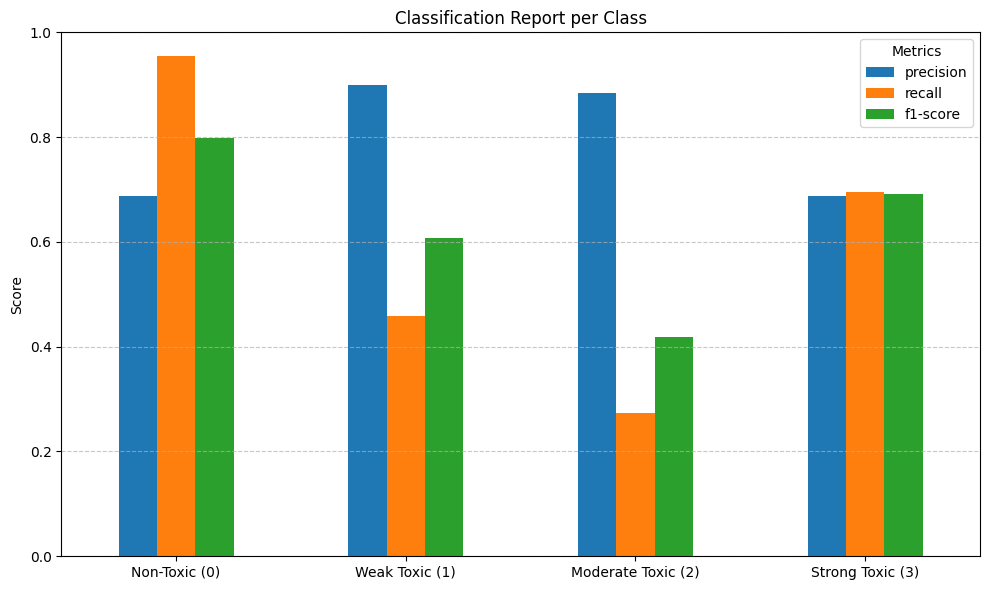

In [9]:
# Visualisasi classification report (precision, recall, f1-score) untuk setiap kelas
metrics = ['precision', 'recall', 'f1-score']
class_report = report_df.loc[target_names, metrics]

plt.figure(figsize=(10, 6))
class_report.plot(kind='bar', ax=plt.gca())
plt.title('Classification Report per Class')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

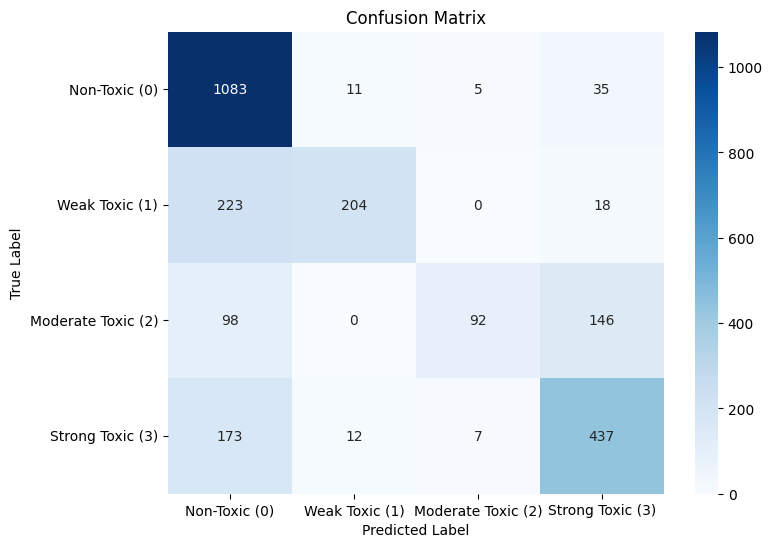

In [7]:
# Visualisasikan confusion matrix dalam bentuk gambar
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [10]:
print("Melatih ulang model dengan seluruh data untuk disimpan...")

# Latih ulang pipeline dengan seluruh data (X dan y)
final_model_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])
final_model_pipeline.fit(X, y)

# Simpan model final
model_filename = 'sentiment_model_pipeline.pkl'
joblib.dump(final_model_pipeline, model_filename)

print(f"Model final telah dilatih dan disimpan sebagai '{model_filename}'")

Melatih ulang model dengan seluruh data untuk disimpan...
Model final telah dilatih dan disimpan sebagai 'sentiment_model_pipeline.pkl'


In [11]:
# Muat kembali model dari file
model_filename = 'sentiment_model_pipeline.pkl'
loaded_model = joblib.load(model_filename)

# Definisikan pemetaan dari label angka ke nama deskriptif
label_map = {
    0: "Aman(Non-Toxic)",
    1: "Sedikit Toxic (Weak Toxic)",
    2: "Cukup Toxic (Moderate Toxic)",
    3: "Sangat Toxic (Strong Toxic)"
}

# Siapkan contoh teks untuk diuji
contoh_teks_1 = "kamu hebat dan sangat pintar, saya suka sekali dengan pekerjaanmu"
contoh_teks_2 = "dasar bodoh, pergi dari sini anjing sialan"
contoh_teks_3 = "gue ga ngerti kenapa dia begitu"

# Lakukan prediksi
prediksi_1 = loaded_model.predict([contoh_teks_1])[0]
prediksi_2 = loaded_model.predict([contoh_teks_2])[0]
prediksi_3 = loaded_model.predict([contoh_teks_3])[0]

# Tampilkan hasil dengan nama label yang deskriptif
print("--- Hasil Uji Coba Model ---")
print(f"Teks: '{contoh_teks_1}'")
print(f"--> Prediksi: {label_map.get(prediksi_1, 'Label Tidak Diketahui')}\n")

print(f"Teks: '{contoh_teks_2}'")
print(f"--> Prediksi: {label_map.get(prediksi_2, 'Label Tidak Diketahui')}\n")

print(f"Teks: '{contoh_teks_3}'")
print(f"--> Prediksi: {label_map.get(prediksi_3, 'Label Tidak Diketahui')}\n")

--- Hasil Uji Coba Model ---
Teks: 'kamu hebat dan sangat pintar, saya suka sekali dengan pekerjaanmu'
--> Prediksi: Aman(Non-Toxic)

Teks: 'dasar bodoh, pergi dari sini anjing sialan'
--> Prediksi: Sangat Toxic (Strong Toxic)

Teks: 'gue ga ngerti kenapa dia begitu'
--> Prediksi: Aman(Non-Toxic)

